# Analyse des Ouragans sur l'arc antillais

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from utils.separationOuragan import getNumberOfHurricane, getSeparedHurricane


## Les données


In [20]:
all_data = pd.read_csv("data/Historical_Hurricane_Tracks.csv")

In [21]:
print(f"Nous travaillons a partir d'un fichier csv contenant les données des ouragans et de tempêtes du monde entier depuis {all_data['year'].min()} jusqu'en {all_data['year'].max()}\n")
print(f"Le fichier contient {all_data.shape[0]} lignes et {all_data.shape[1]} colonnes")
print(f"\nLes colonnes sont : \n {all_data.columns.tolist()}")





Nous travaillons a partir d'un fichier csv contenant les données des ouragans et de tempêtes du monde entier depuis 1842 jusqu'en 2023

Le fichier contient 697476 lignes et 13 colonnes

Les colonnes sont : 
 ['OBJECTID', 'SID', 'BASIN', 'SUBBASIN', 'NAME', 'LAT', 'LON', 'USA_WIND', 'USA_PRES', 'year', 'month', 'day', 'Hurricane_Date']


In [22]:
# Compter les ouragans nommés
hurricanes_names = all_data[all_data['NAME'] != 'NOT_NAMED']
num_hurricanes_names = hurricanes_names.shape[0]

# Compter les ouragans non nommés
hurricanes_not_names = all_data[all_data['NAME'] == 'NOT_NAMED']
num_hurricanes_not_names = hurricanes_not_names.shape[0]



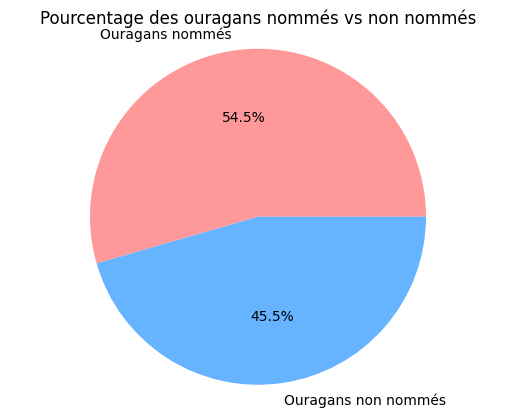

In [23]:
# Créer un camembert
labels = ['Ouragans nommés', 'Ouragans non nommés']
sizes = [num_hurricanes_names, num_hurricanes_not_names]
colors = ['#ff9999','#66b3ff']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title("Pourcentage des ouragans nommés vs non nommés")
plt.axis('equal')

plt.show()

In [24]:
nb = getNumberOfHurricane(all_data)
nb_nommé = getNumberOfHurricane(hurricanes_names)


/Users/dimitriaigle/DataspellProjects/pythonProject/utils/separationOuragan.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Hurricane_Date"] = pd.to_datetime(data["Hurricane_Date"])
/Users/dimitriaigle/DataspellProjects/pythonProject/utils/separationOuragan.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Date_Diff"] = data["Hurricane_Date"].diff()


In [25]:
print(f"Ce fichier contient des information sur {nb} ouragans dont {nb_nommé} sont nommés")


Ce fichier contient des information sur 2500 ouragans dont 850 sont nommés


nous utiliserons uniquement les ouragans nommés pour la suite de l'analyse

In [26]:
all_ouragans = getSeparedHurricane(hurricanes_names)
print(type(all_ouragans))

<class 'list'>


/Users/dimitriaigle/DataspellProjects/pythonProject/utils/separationOuragan.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Hurricane_Date"] = pd.to_datetime(data["Hurricane_Date"])
/Users/dimitriaigle/DataspellProjects/pythonProject/utils/separationOuragan.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Date_Diff"] = data["Hurricane_Date"].diff()


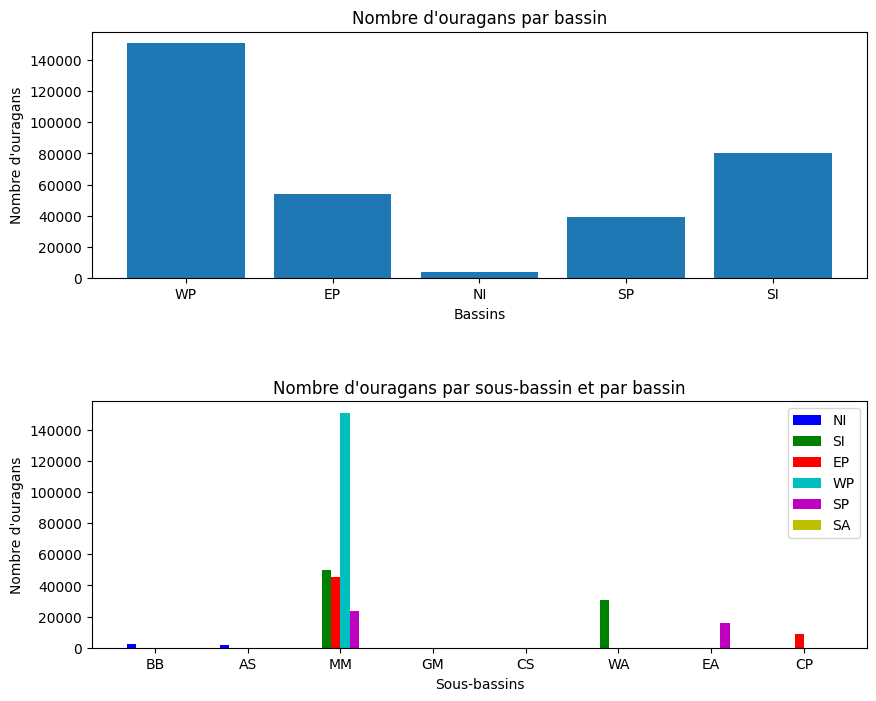

In [29]:


# Liste des bassins et sous-bassins
bassins = ['NI', 'SI', 'EP', 'WP', 'SP', 'SA']
sous_bassins = ['BB', 'AS', 'MM', 'GM', 'CS', 'WA', 'EA', 'CP']

# Compteurs pour le nombre d'ouragans par bassin et sous-bassin
compteur_bassins = Counter()
compteur_sous_bassins = {bassin: Counter() for bassin in bassins}

# Parcourir les dataframes
for dataframe in all_ouragans:
    # Compter les ouragans par bassin
    compteur_bassins.update(dataframe['BASIN'].dropna().tolist())

    # Compter les ouragans par sous-bassin de chaque bassin
    for bassin in bassins:
        sous_bassin_counts = dataframe[dataframe['BASIN'] == bassin]['SUBBASIN'].dropna().tolist()
        compteur_sous_bassins[bassin].update(sous_bassin_counts)

# Créer le graphique à barres
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
fig.subplots_adjust(hspace=0.5)

# Graphique pour le nombre d'ouragans par bassin
ax1.bar(compteur_bassins.keys(), compteur_bassins.values())
ax1.set_xlabel('Bassins')
ax1.set_ylabel("Nombre d'ouragans")
ax1.set_title("Nombre d'ouragans par bassin")

# Graphique pour le nombre d'ouragans dans chaque sous-bassin par bassin
x = range(len(sous_bassins))
width = 0.1
colors = ['b', 'g', 'r', 'c', 'm', 'y']

for i, bassin in enumerate(bassins):
    counts = [compteur_sous_bassins[bassin][sous_bassin] for sous_bassin in sous_bassins]
    ax2.bar([val + (i * width) for val in x], counts, width=width, color=colors[i], label=bassin)

ax2.set_xlabel('Sous-bassins')
ax2.set_ylabel("Nombre d'ouragans")
ax2.set_title("Nombre d'ouragans par sous-bassin et par bassin")
ax2.set_xticks([val + ((len(bassins) - 1) * width) / 2 for val in x])
ax2.set_xticklabels(sous_bassins)
ax2.legend(bassins)

plt.show()

